# **Assignment 3 - Part C_3**

## **High level: Using tensorflow keras linear module to build a 3 layer neural network with high level primitives.**
TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on dataflow and differentiable programming.

In [1]:
##Importing the required libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf

In [2]:
##Initializing the weights - tensor of shape 2*3
a = tf.constant([[1,2,3], [4,5,6]])
a.shape

TensorShape([2, 3])

In [3]:
##Initializing the appropriate bias
bias = tf.constant([[1], [0.5]])
bias.shape

TensorShape([2, 1])

In [4]:
##Generate random values for x - shape: 500 * 3
n = 500
d = 3
x = tf.random.normal([n,d], -1, 1, tf.float64, seed=1)
x.shape

TensorShape([500, 3])

In [5]:
##Generating 3d non-linear input and calculating y_true values
a = tf.cast(a, tf.float64)
bias = tf.cast(bias, tf.float64)
x = tf.cast(x, tf.float64)

## y1 = x_1^2 + 2 * x_2^2 + 3 * x_3^2 + x_1 + 2 * x_2 + 3 * x_3 + 1
## y2 = 4 * x_1^2 + 5 * x_2^2 + 6 * x_3^2 + 4 * x_1 + 5 * x_2 + 6 * x_3 + 0.5
##Calculating actual output for the data

a = tf.transpose(a)
bias = tf.transpose(bias)
y_true = tf.matmul(x ** 2, a) + tf.matmul(x, a) + bias

##Checking shapes for input, weight, bias and output tensors
print(f'x: {x.shape}, weights: {a.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (500, 3), weights: (3, 2), bias: (1, 2), y: (500, 2)


In [6]:
##Visualizing the data distribution using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=5).fit_transform(x)
tsne.shape

(500, 2)

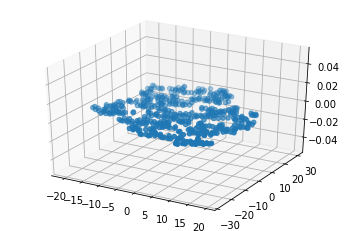

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne))
plt.show()

In [8]:
##Function for tsne plot visualization
def tsne_plot(text, tsne, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(tsne[:, 0], tsne[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    ax.scatter(tsne[:, 0], tsne[:, 1], y_pred[:, 0], label='our function')
  plt.title(text)
  plt.legend()

In [9]:
def plot_3d(text, x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred[:, 0], label='our function')
  plt.title(text)
  plt.legend()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
regression (Dense)           (None, 2)                 22        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
16/16 [==============================] - 0s 1ms/step - loss: 192.4298
Epoch 2/30
16/16 [==============================] - 0s 1ms/step - loss: 107.6388
Epoch 3/30
16/16 [==============================] - 0s 1ms/step - loss: 82.0359
Epoch 4/30
16/16 [==============================] - 0s 1ms/step - loss: 66.6775
Epoch 5/30
16/16 [==============================] - 0s 1ms/step - lo

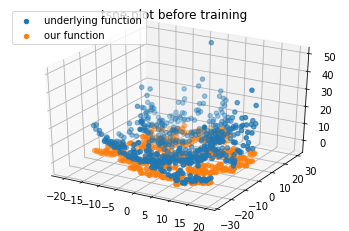

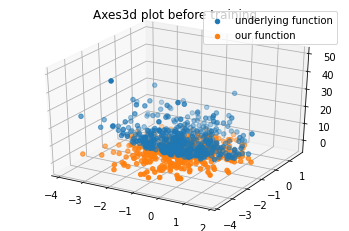

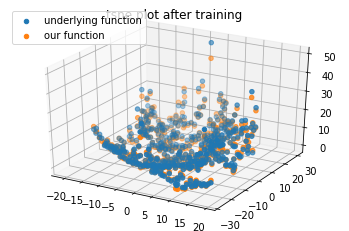

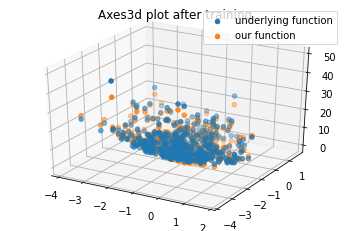

In [10]:
##Building the model
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
# l2 = layers.Dense(4, activation='relu', name='dense_2')(l1)
outputs = layers.Dense(2, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

##tsne plot before training
y_pred = model.predict(x)
text = "tsne plot before training"
tsne_plot(text, tsne, y_true, y_pred)

##Axes3d plot before training
text = "Axes3d plot before training"
plot_3d(text, x, y_true, y_pred)

##Training the model
model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
model.fit(x, y_true, epochs=30)
y_pred = model.predict(x)

##Plot after training
text = "tsne plot after training"
tsne_plot(text, tsne, y_true, y_pred)

##Axes3d plot after training
text = "Axes3d plot after training"
plot_3d(text, x, y_true, y_pred)

We can see how after training, the shape of the data before and after is now similar/overlapping